# Generation for NLP Data EDA


## Install Packages


In [1]:
%pip install -r requirements.txt -q

Note: you may need to restart the kernel to use updated packages.


## Import Necessary Libraries


In [ ]:
from ast import literal_eval

import matplotlib.axes._axes as axes
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

pd.set_option("display.max_columns", None)


# 셀 너비에 맞게 줄바꿈
pd.options.display.max_colwidth = 100  # 열 너비를 설정 (원하는 수치로 조정 가능)
pd.options.display.width = 0  # 자동 줄바꿈 활성화
pd.options.display.max_rows = 20  # 최대 행 수 (적절히 설정)

## EDA


### Load Data


In [ ]:
train_datapath = "data/train_v2.0.1.csv"
test_datapath = "data/test_v1.0.2.csv"
df_train = pd.read_csv(train_datapath)
df_test = pd.read_csv(test_datapath)

### 중략, 하략이 포함된 데이터


In [ ]:
print(len(df_test[df_test["paragraph"].str.contains("중략", na=False)]))
print(len(df_train[df_train["paragraph"].str.contains("중략", na=False)]))
print(len(df_test[df_test["paragraph"].str.contains("하략", na=False)]))
print(len(df_train[df_train["paragraph"].str.contains("하략", na=False)]))

64
13
0
1


### Print missing values


In [ ]:
print("\nMissing values in Train:")
print(df_train.isnull().sum())


Missing values in Train:
id                  0
paragraph           0
question            0
choices             0
answer              0
question_plus    2028
dtype: int64


In [ ]:
print("\nMissing values in Test:")
print(df_test.isnull().sum())


Missing values in Test:
id                 0
paragraph          0
question           0
choices            0
question_plus    767
dtype: int64


### Basic information about the dataset


In [ ]:
print("\nTrain Dataset Information:")
df_train.info()


Train Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2029 entries, 0 to 2028
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             2029 non-null   object
 1   paragraph      2029 non-null   object
 2   question       2029 non-null   object
 3   choices        2029 non-null   object
 4   answer         2029 non-null   int64 
 5   question_plus  1 non-null      object
dtypes: int64(1), object(5)
memory usage: 95.2+ KB


In [ ]:
print("\nTest Dataset Information:")
df_test.info()


Test Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 869 entries, 0 to 868
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             869 non-null    object
 1   paragraph      869 non-null    object
 2   question       869 non-null    object
 3   choices        869 non-null    object
 4   question_plus  102 non-null    object
dtypes: object(5)
memory usage: 34.1+ KB


### Length Distribution


In [ ]:
def plot_length_distribution(ax: axes.Axes, df: pd.DataFrame, column: str, title: str, bins=30, color="skyblue"):
    """
    주어진 DataFrame의 column 문자열 길이 분포를 히스토그램으로 시각화합니다.
    """
    # 문자열 길이 계산
    lengths = df[column].str.len()

    ax.hist(lengths, bins=bins, color=color, edgecolor="black", alpha=0.7)
    ax.set_title(f"{title} {column} Length Distribution", fontsize=16)
    ax.set_xlabel(f"Length of {title} {column}", fontsize=12)
    ax.set_ylabel("Frequency", fontsize=12)
    ax.grid(axis="y", linestyle="--", alpha=0.7)

In [ ]:
def plot_length_distribution_percentage(
    ax: axes.Axes, df: pd.DataFrame, column: str, title: str, bin_size=10, color="skyblue"
):
    """
    주어진 DataFrame의 column 문자열 길이 분포를 히스토그램으로 시각화하며, 각 bin의 비율(%)을 계산하여 표시합니다.
    """
    # 문자열 길이 계산
    lengths = df[column].str.len()

    # Bin 범위 설정
    max_length = lengths.max()
    bins = range(0, max_length + bin_size, bin_size)

    # 히스토그램 계산
    counts, edges = np.histogram(lengths, bins=bins)

    # 각 bin의 비율(%) 계산
    percentages = (counts / len(lengths)) * 100

    ax.bar(edges[:-1], percentages, width=bin_size, color=color, edgecolor="black", alpha=0.7, align="edge")
    ax.set_title(f"{title} {column} Length Distribution (Percentage)", fontsize=16)
    ax.set_xlabel("Length of " + column, fontsize=12)
    ax.set_ylabel("Percentage (%)", fontsize=12)
    ax.grid(axis="y", linestyle="--", alpha=0.7)

In [ ]:
def plot_length_boxplot(ax: axes.Axes, column: str):
    """
    주어진 DataFrame의 column 문자열 길이 분포를 박스 플롯으로 시각화합니다.
    """
    train_lengths = df_train[column].str.len()
    test_lengths = df_test[column].str.len()

    # 박스 플롯 그리기
    boxes = ax.boxplot(
        [test_lengths, train_lengths],
        vert=False,
        patch_artist=True,
        flierprops=dict(markerfacecolor="red", marker="o", markersize=5),
        medianprops=dict(color="red"),
    )

    colors = ["lightgreen", "skyblue"]
    for patch, color in zip(boxes["boxes"], colors):
        patch.set_facecolor(color)

    ax.set_title(f"{column} Length Distribution", fontsize=16)
    ax.set_xlabel(f"Length of {column}", fontsize=12)
    ax.set_yticklabels(["Test Data", "Train Data"])
    ax.grid(axis="x", linestyle="--", alpha=0.7)

#### Question 길이 분포


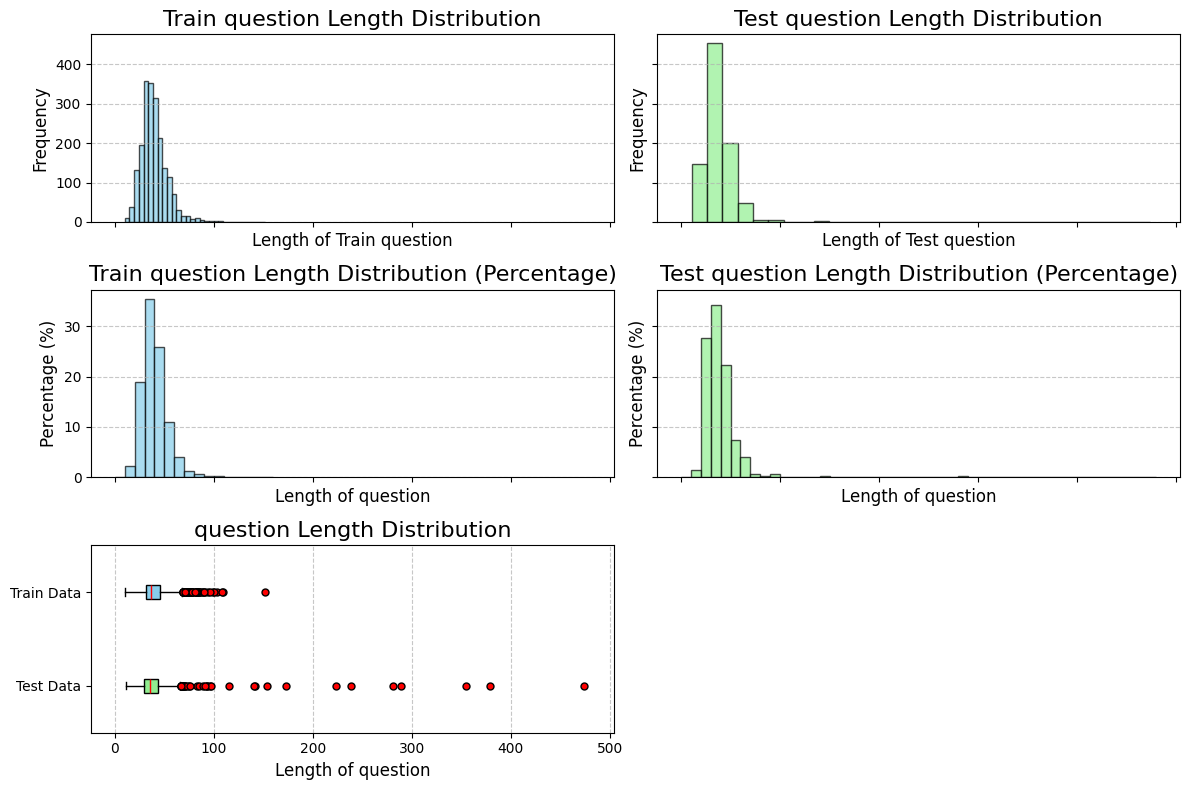

In [ ]:
fig, axes_list = plt.subplots(3, 2, figsize=(12, 8), sharex=True, sharey="row")

axes_list = axes_list.flatten()

plot_length_distribution(axes_list[0], df_train, column="question", title="Train", color="skyblue")
plot_length_distribution(axes_list[1], df_test, column="question", title="Test", color="lightgreen")

plot_length_distribution_percentage(axes_list[2], df_train, column="question", title="Train", color="skyblue")
plot_length_distribution_percentage(axes_list[3], df_test, column="question", title="Test", color="lightgreen")

plot_length_boxplot(axes_list[4], column="question")
axes_list[5].axis("off")

plt.tight_layout()
plt.show()

#### Paragraph 길이 분포


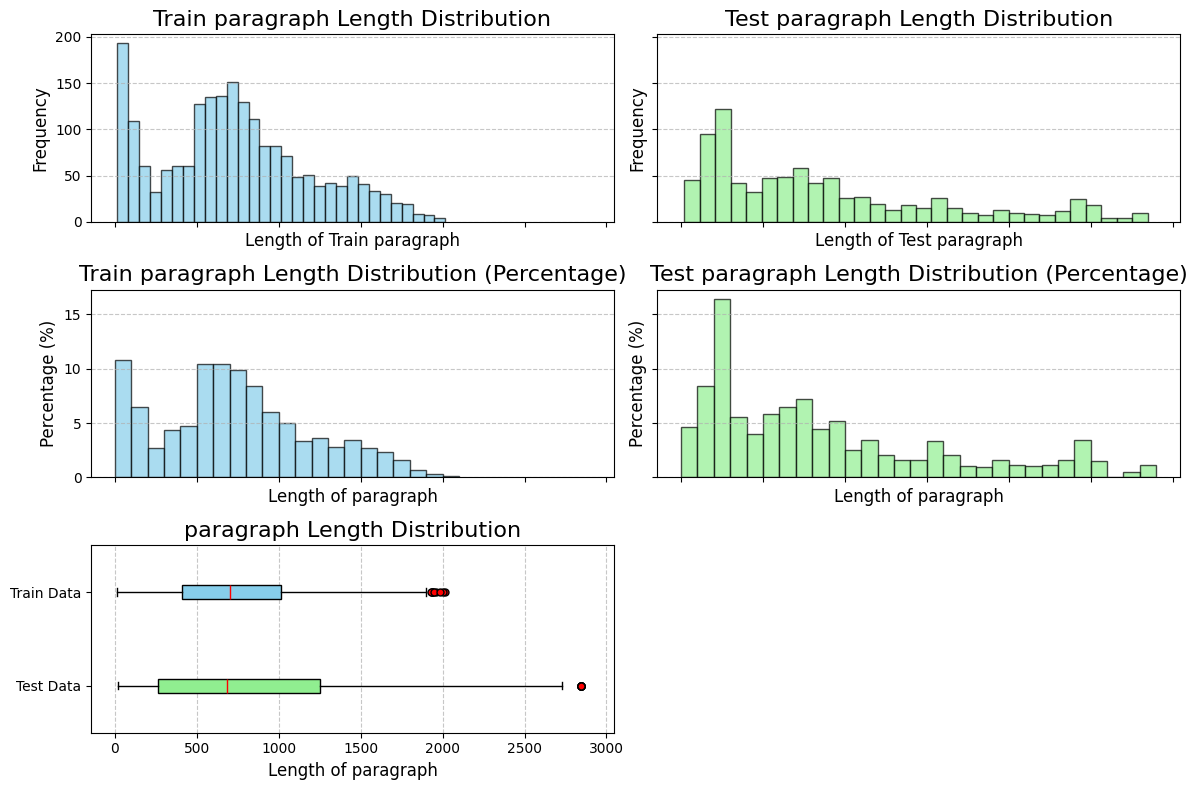

In [ ]:
fig, axes_list = plt.subplots(3, 2, figsize=(12, 8), sharex=True, sharey="row")

axes_list = axes_list.flatten()

plot_length_distribution(axes_list[0], df_train, column="paragraph", title="Train", color="skyblue")
plot_length_distribution(axes_list[1], df_test, column="paragraph", title="Test", color="lightgreen")

plot_length_distribution_percentage(
    axes_list[2], df_train, column="paragraph", title="Train", bin_size=100, color="skyblue"
)
plot_length_distribution_percentage(
    axes_list[3], df_test, column="paragraph", title="Test", bin_size=100, color="lightgreen"
)

plot_length_boxplot(axes_list[4], column="paragraph")
axes_list[5].axis("off")

plt.tight_layout()
plt.show()

#### Question plus 길이 분포

train 내 question plus는 오직 1개 존재


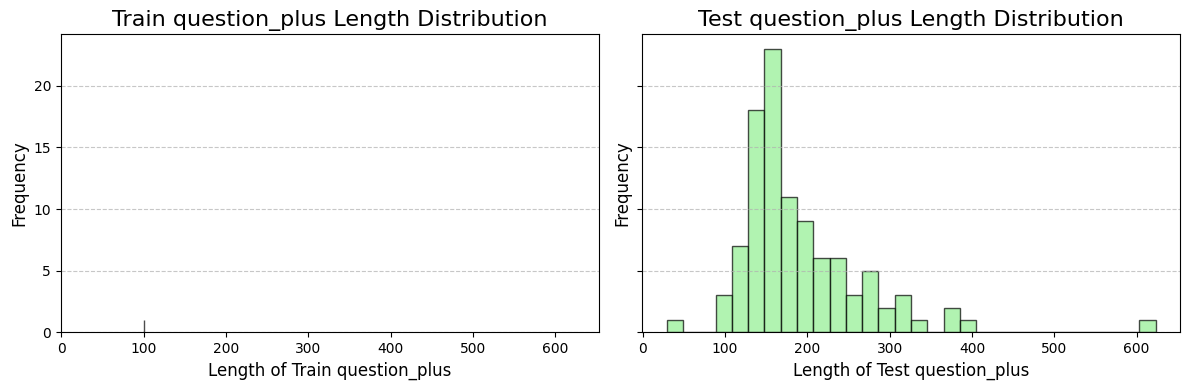

In [ ]:
fig, axes_list = plt.subplots(1, 2, figsize=(12, 4), sharex=True, sharey=True)

plot_length_distribution(axes_list[0], df_train, column="question_plus", title="Train", color="skyblue")
plot_length_distribution(axes_list[1], df_test, column="question_plus", title="Test", color="lightgreen")

plt.tight_layout()
plt.show()

#### Choices String 길이 분포


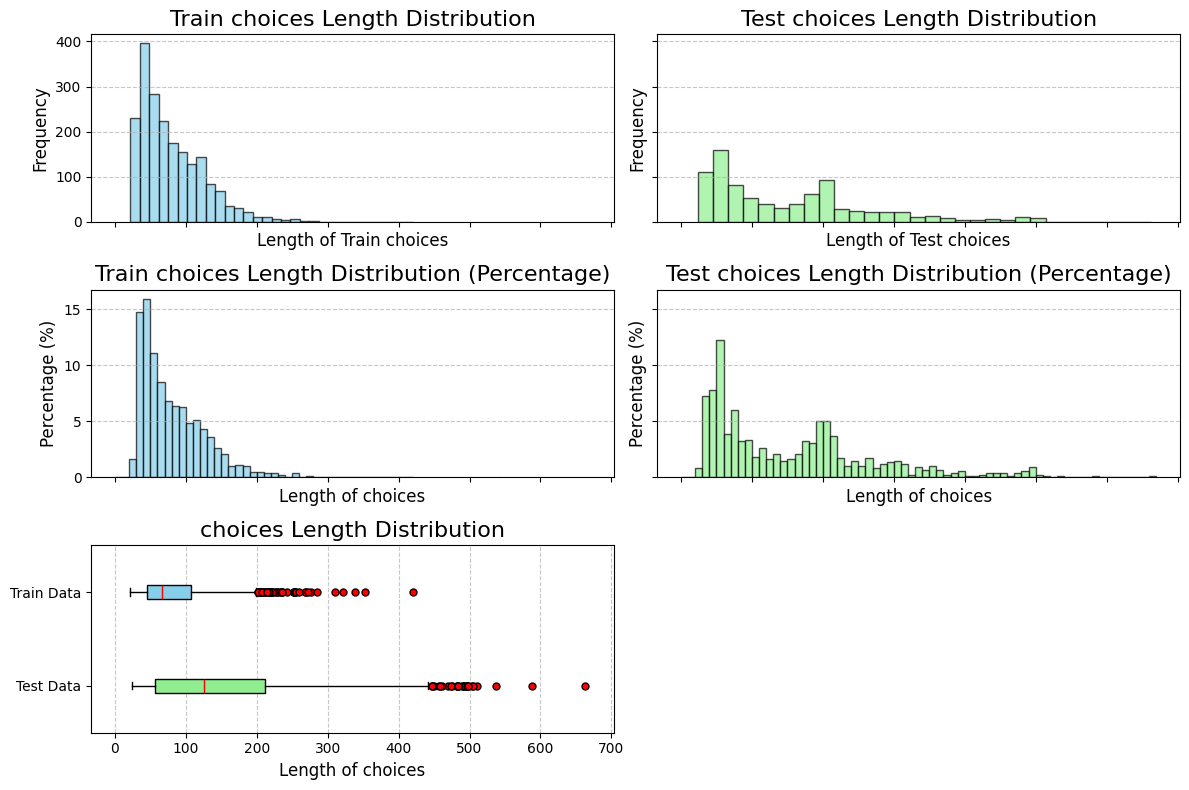

In [ ]:
fig, axes_list = plt.subplots(3, 2, figsize=(12, 8), sharex=True, sharey="row")

axes_list = axes_list.flatten()

plot_length_distribution(axes_list[0], df_train, column="choices", title="Train", color="skyblue")
plot_length_distribution(axes_list[1], df_test, column="choices", title="Test", color="lightgreen")

plot_length_distribution_percentage(
    axes_list[2], df_train, column="choices", title="Train", bin_size=10, color="skyblue"
)
plot_length_distribution_percentage(
    axes_list[3], df_test, column="choices", title="Test", bin_size=10, color="lightgreen"
)

plot_length_boxplot(axes_list[4], column="choices")
axes_list[5].axis("off")

plt.tight_layout()
plt.show()

In [ ]:
def plot_full_length_distribution(ax: axes.Axes, df: pd.DataFrame, title: str, bins=30, color="skyblue"):
    """
    주어진 DataFrame의 여러 컬럼(question, question_plus, paragraph, choices)의 문자열 길이 합산 분포를
    히스토그램으로 시각화합니다.
    """
    # 각 컬럼의 문자열 길이 계산, None이나 NaN 값은 0으로 처리
    total_lengths = df[["question", "paragraph", "choices", "question_plus"]].map(len).sum(axis=1)

    ax.hist(total_lengths, bins=bins, color=color, edgecolor="black", alpha=0.7)
    ax.set_title(f"{title} Full inputs Length Distribution", fontsize=16)
    ax.set_xlabel("Total Length of full inputs", fontsize=12)
    ax.set_ylabel("Frequency", fontsize=12)
    ax.grid(axis="y", linestyle="--", alpha=0.7)


def plot_full_length_distribution_percentage(
    ax: axes.Axes, df: pd.DataFrame, title: str, bin_size=100, color="skyblue"
):
    """
    주어진 DataFrame의 여러 컬럼(question, question_plus, paragraph, choices)의 문자열 길이 합산 분포를
    각 bin의 비율(%)을 계산하여 히스토그램으로 시각화합니다.
    """
    # 문자열 길이 계산
    total_lengths = df[["question", "paragraph", "choices", "question_plus"]].map(len).sum(axis=1)

    # bin 범위 설정
    max_length = total_lengths.max()
    bins = range(0, max_length + bin_size, bin_size)

    # 히스토그램 계산
    counts, edges = np.histogram(total_lengths, bins=bins)

    # 각 bin의 비율(%) 계산
    percentages = (counts / len(total_lengths)) * 100

    ax.bar(edges[:-1], percentages, width=bin_size, color=color, edgecolor="black", alpha=0.7, align="edge")
    ax.set_title(f"{title} Full inputs Length Distribution (Percentage)", fontsize=16)
    ax.set_xlabel("Total Length of full inputs", fontsize=12)
    ax.set_ylabel("Percentage (%)", fontsize=12)
    ax.grid(axis="y", linestyle="--", alpha=0.7)


def plot_full_length_boxplot(ax: axes.Axes):
    """
    주어진 DataFrame의 여러 컬럼(question, question_plus, paragraph, choices)의 문자열 길이 합산을 박스 플롯으로 시각화합니다.
    """
    train_lengths = df_train[["question", "paragraph", "choices", "question_plus"]].map(len).sum(axis=1)
    test_lengths = df_test[["question", "paragraph", "choices", "question_plus"]].map(len).sum(axis=1)

    # 박스 플롯 그리기
    boxes = ax.boxplot(
        [test_lengths, train_lengths],
        vert=False,
        patch_artist=True,
        flierprops=dict(markerfacecolor="red", marker="o", markersize=5),
        medianprops=dict(color="red"),
    )

    colors = ["lightgreen", "skyblue"]
    for patch, color in zip(boxes["boxes"], colors):
        patch.set_facecolor(color)

    ax.set_title("Full inputs Length Distribution", fontsize=16)
    ax.set_xlabel("Total Length of full inputs", fontsize=12)
    ax.set_yticklabels(["Test Data", "Train Data"])
    ax.grid(axis="x", linestyle="--", alpha=0.7)

In [ ]:
# question_plus 결측치 처리
df_train["question_plus"] = df_train["question_plus"].fillna("")
df_test["question_plus"] = df_test["question_plus"].fillna("")

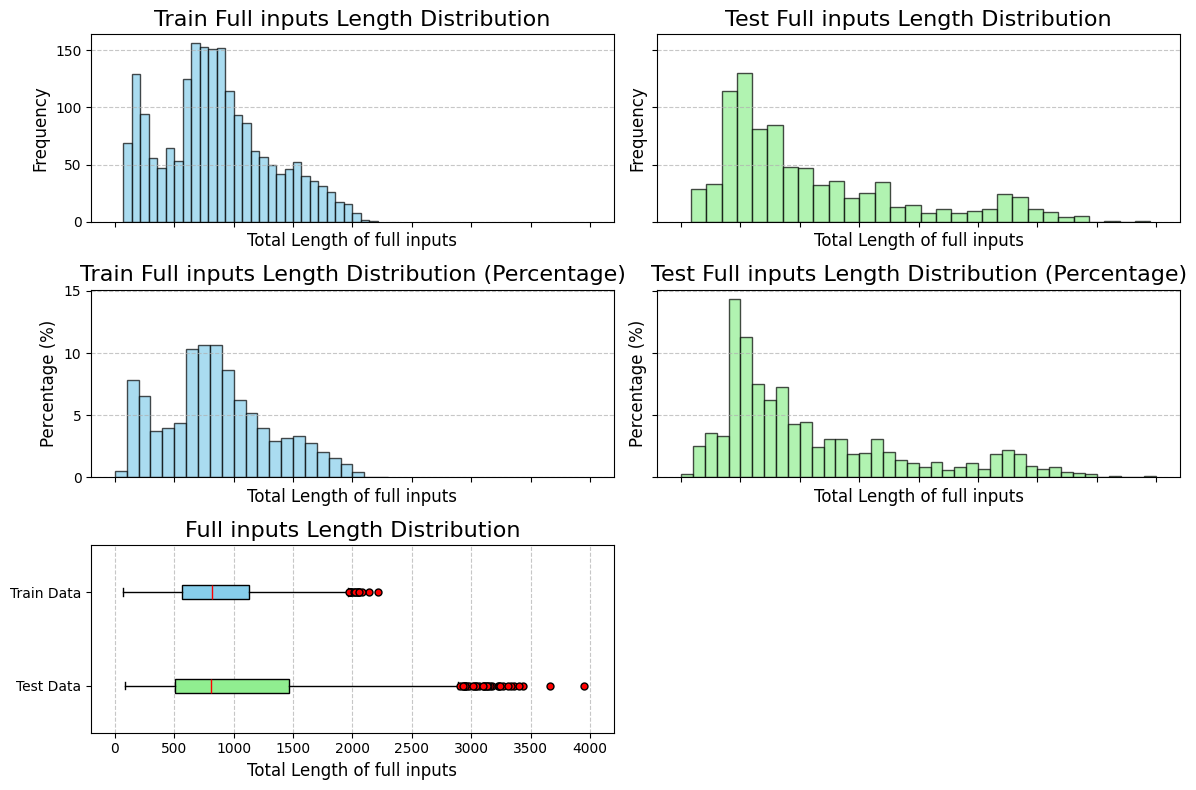

In [ ]:
fig, axes_list = plt.subplots(3, 2, figsize=(12, 8), sharex=True, sharey="row")

axes_list = axes_list.flatten()

plot_full_length_distribution(axes_list[0], df_train, title="Train", color="skyblue")
plot_full_length_distribution(axes_list[1], df_test, title="Test", color="lightgreen")

plot_full_length_distribution_percentage(axes_list[2], df_train, title="Train", color="skyblue")
plot_full_length_distribution_percentage(axes_list[3], df_test, title="Test", color="lightgreen")

plot_full_length_boxplot(axes_list[4])
axes_list[5].axis("off")

plt.tight_layout()
plt.show()

### 4지선다, 5지선다 문제 분포


In [ ]:
def plot_choices_length_distribution(ax: axes.Axes, df: pd.DataFrame, title: str, bins=2, color="skyblue"):
    """
    주어진 DataFrame의 선택지 개수별 비율을 히스토그램으로 시각화합니다.
    """
    # 선택지 길이 계산
    list_lengths = df["choices"].apply(len)

    # 빈도수 계산 및 비율로 변환
    value_counts = list_lengths.value_counts(normalize=True).sort_index() * 100

    for idx, value in zip(value_counts.index, value_counts.values):
        ax.text(idx, value - 5, f"{value:.1f}%", ha="center", fontsize=10, color="black")

    ax.bar(value_counts.index, value_counts.values, color=color, edgecolor="black", alpha=0.7)
    ax.set_title(f"{title} Choices Length Distribution (Percentage)", fontsize=16)
    ax.set_xlabel("Length of Choices", fontsize=12)
    ax.set_ylabel("Percentage (%)", fontsize=12)
    ax.grid(axis="y", linestyle="--", alpha=0.7)

    # x축 범위 설정
    ax.set_xticks(value_counts.index)

In [ ]:
# string 형식의 'choices' list화
df_train["choices"] = df_train["choices"].apply(literal_eval)
df_test["choices"] = df_test["choices"].apply(literal_eval)

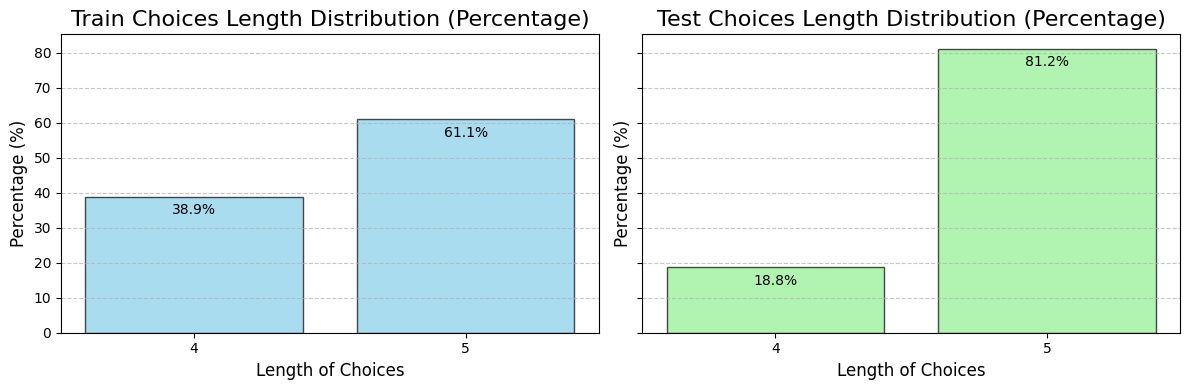

In [ ]:
fig, axes_list = plt.subplots(1, 2, figsize=(12, 4), sharex=True, sharey=True)

plot_choices_length_distribution(axes_list[0], df_train, title="Train", color="skyblue")
plot_choices_length_distribution(axes_list[1], df_test, title="Test", color="lightgreen")

plt.tight_layout()
plt.show()

현재 최고점 결과 내에 4지선다 문제인데 5번을 뽑은 경우는 단 한번도 없음


In [ ]:
submit_datapath = "data/lLama_3.1_8b_ITA_output.csv"
df_submit = pd.read_csv(submit_datapath)
df_test["choices_count"] = df_test["choices"].apply(len)
df_test = df_test.merge(df_submit[["id", "answer"]], on="id", how="left")
df_test.head()

,id,paragraph,question,choices,question_plus,choices_count,answer
0,generation-for-nlp-0,사람들이 지속적으로 책을 읽는 이유 중 하나는 즐거움이다 . 독서의 즐거움에는 여러 가지가 있겠지만 그 중심에는 ‘소통의 즐거움’이 있다. 독자는 독서를 통해 책과 소...,윗글의 내용과 일치하지 않는 것은?,"[같은 책을 읽은 독자라도 서로 다른 의미를 구성할 수 있다 ., 다른 독자와의 소통은 독자가 인식의 폭을 확장하도록 돕는다 ., 독자는 직접 경험해 보지 못했던 다양한 삶...",,5,2
1,generation-for-nlp-1,사람들이 지속적으로 책을 읽는 이유 중 하나는 즐거움이다 . 독서의 즐거움에는 여러 가지가 있겠지만 그 중심에는 ‘소통의 즐거움’이 있다. 독자는 독서를 통해 책과 소...,윗글을 읽고 ㉠에 대해 보인 반응으로 적절하지 않은 것은?,"[스스로 독서 계획을 세우고 자신에게 필요한 책을 찾아 개인적 으로 읽는 과정에서 경험할 수 있겠군., 독서 모임에서 서로 다른 관점을 확인하고 자신의 관점을 조정하는 과...",,5,1
2,generation-for-nlp-2,"(가 ) 중국에서 비롯된 유서( 類書)는 고금의 서적에서 자료를 수집하고 항목별로 분류, 정리하여 이용에 편리하도록 편찬한 서적이다. 일반적으로 유서는 기존 서적에...",(가 )와 (나 )에 대한 설명으로 가장 적절한 것은?,"[(가 )는 유서의 유형을 분류하였고 , (나 )는 유서의 분류 기준과 적절성 여부를 평가하였다., (가 )는 유서의 개념과 유용성을 소개하였고 , (나 )는 국가별...",,5,4
3,generation-for-nlp-3,"(가 ) 중국에서 비롯된 유서( 類書)는 고금의 서적에서 자료를 수집하고 항목별로 분류, 정리하여 이용에 편리하도록 편찬한 서적이다. 일반적으로 유서는 기존 서적에...",[A ]에 대한 이해로 적절하지 않은 것은?,"[조선에서 편찬자가 미상인 유서가 많았던 것은 편찬자의 개인적 목적으로 유서를 활용하려 했기 때문이다 ., 조선에서는 시문 창작, 과거 시험 등에 필요한 내용을 담은 ...",,5,5
4,generation-for-nlp-4,"(가 ) 중국에서 비롯된 유서( 類書)는 고금의 서적에서 자료를 수집하고 항목별로 분류, 정리하여 이용에 편리하도록 편찬한 서적이다. 일반적으로 유서는 기존 서적에...","㉮에 대한 이해를 바탕으로 ㉠ , ㉡에 대해 파악한 내용으로 적절하지 않은 것은?","[지식의 제공이라는 ㉮의 편찬 의도는, ㉠에서 지식을 심화하고 확장하여 소개한 것에서 나타난다., 지식을 재분류하여 범주화한 ㉮의 방식은 , ㉠에서 해부학과 생리 학...",,5,4


In [ ]:
# 보기 외의 정답을 꼽은 경우
filtered_df = df_test[df_test["answer"] > df_test["choices_count"]]
len(filtered_df)

0

### 중복 지문


In [ ]:
# train 내 중복 개수 체크
def check_duplication_in(df: pd.DataFrame):
    unique_df = set(df["paragraph"])
    print(
        f"전체 지문 {len(df)}개 중 중복을 제거한 지문의 개수는 {len(unique_df)}개로, 총 {len(df)-len(unique_df)}개의 중복이 존재한다."
    )


check_duplication_in(df_train)
check_duplication_in(df_test)

전체 지문 2029개 중 중복을 제거한 지문의 개수는 1871개로, 총 158개의 중복이 존재한다.
전체 지문 869개 중 중복을 제거한 지문의 개수는 725개로, 총 144개의 중복이 존재한다.


### 형태소 분석


In [1]:
%pip install kiwipiepy -q


[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
from kiwipiepy import Kiwi

kiwi = Kiwi()

In [ ]:
from typing import List


def analyze_text(text: str):
    result = kiwi.analyze(text)
    return result


def extract_multi_char_nouns(text: str) -> List[str]:
    nouns = []
    result = analyze_text(text)
    for token, pos, _, _ in result[0][0]:
        if len(token) > 1 and (pos.startswith("N") or pos.startswith("SL")):
            nouns.append(token)
    return nouns


def extract_tokens(text: str) -> List[str]:
    tokens = []
    result = analyze_text(text)
    for token, pos, _, _ in result[0][0]:
        if not pos.startswith("S"):
            tokens.append(token)
    return tokens

In [ ]:
text = "안녕하세요. 저는 한국어 형태소 분석기인 Kiwi를 사용하여 명사를 추출하는 예제입니다."

# 명사 추출
nouns = extract_multi_char_nouns(text)
print(nouns)

# 모든 토큰 추출
tokens = extract_tokens(text)
print(tokens)

['안녕', '국어', '형태소', '분석기', 'Kiwi', '사용', '명사', '추출', '예제']
['안녕', '하', '세요', '저', '는', '한', '국어', '형태소', '분석기', '이', 'ᆫ', '를', '사용', '하', '어', '명사', '를', '추출', '하', '는', '예제', '이', 'ᆸ니다']


### pyplot 한글 글꼴 적용


In [30]:
!sudo apt-get install fonts-nanum

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 44 not upgraded.


In [ ]:
import matplotlib.font_manager as fm

font_list = fm.findSystemFonts(fontpaths=None, fontext="ttf")
font_name_list = [fm.FontProperties(fname=font).get_name() for font in font_list]
print("사용 가능한 한국어 리스트:")
print(font_name_list)

사용 가능한 한국어 리스트:
['NanumSquareRound', 'NanumBarunGothic', 'NanumGothic', 'NanumBarunGothic', 'NanumGothic', 'NanumMyeongjo', 'NanumMyeongjo', 'NanumSquare', 'NanumSquareRound', 'NanumSquare']


In [ ]:
# 환경변수로 지정
plt.rcParams["font.family"] = "NanumGothic"

#### 자주 등장하는 명사 확인


In [ ]:
import collections


def build_noun_corpus(series):
    sentences = set(series)
    noun_corpus = []
    for sentence in sentences:
        noun_corpus += extract_multi_char_nouns(sentence)
    return noun_corpus


def build_token_corpus(series):
    sentences = set(series)
    token_corpus = []
    for sentence in sentences:
        token_corpus += extract_tokens(sentence)
    return token_corpus  # 빈도 수 순으로 추출


def count_frequency(corpus: List[str]):
    count = collections.Counter(corpus)
    noun_frequency = count.most_common()  # 빈도 수 순으로 추출
    return noun_frequency

실행 시간 1분 14초 여


In [ ]:
train_noun_corpus = build_noun_corpus(df_train["paragraph"])
test_noun_corpus = build_noun_corpus(df_test["paragraph"])

print(f"train_noun_corpus: {len(train_noun_corpus)}")
print(f"test_noun_corpus: {len(test_noun_corpus)}")

train_noun_corpus: 233571
test_noun_corpus: 73870


실행 시간 1분 13초 여


In [ ]:
train_token_corpus = build_token_corpus(df_train["paragraph"])
test_token_corpus = build_token_corpus(df_test["paragraph"])

print(f"train_token_corpus: {len(train_token_corpus)}")
print(f"test_token_corpus: {len(test_token_corpus)}")

train_token_corpus: 639460
test_token_corpus: 224988


In [ ]:
train_noun_frequency = count_frequency(train_noun_corpus)
test_noun_frequency = count_frequency(test_noun_corpus)
train_token_frequency = count_frequency(train_token_corpus)
test_token_frequency = count_frequency(test_token_corpus)

In [ ]:
def plot_frequency(ax, frequency, topN=30, title="", color="skyblue"):
    x, y = [], []
    for word, count in frequency[:topN]:
        x.append(word)
        y.append(count)

    ax.barh(x, y, color=color)
    ax.set_title(f"Top {topN} Frequency - {title}", fontsize=16)
    ax.set_xlabel("Frequency", fontsize=12)
    ax.set_ylabel("Words", fontsize=12)

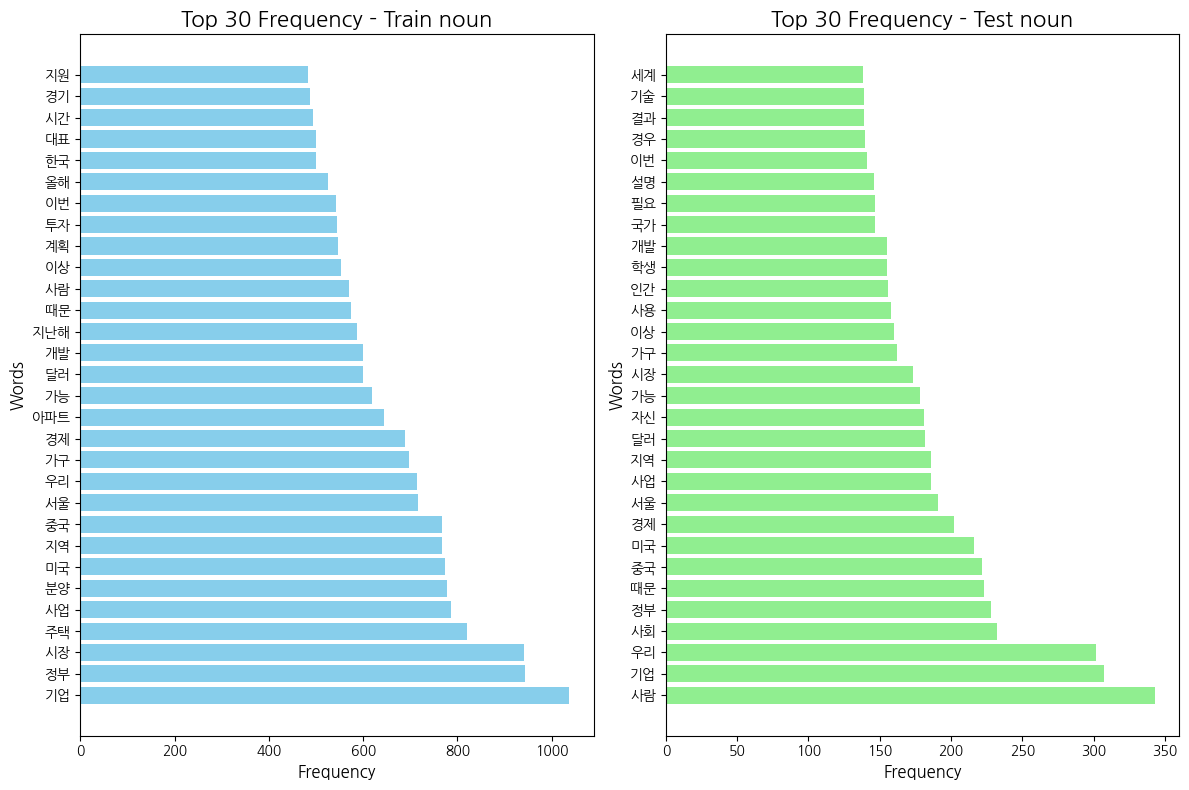

In [ ]:
fig, axes_list = plt.subplots(1, 2, figsize=(12, 8))

plot_frequency(axes_list[0], train_noun_frequency, topN=30, title="Train noun", color="skyblue")

plot_frequency(axes_list[1], test_noun_frequency, topN=30, title="Test noun", color="lightgreen")

plt.tight_layout()
plt.show()

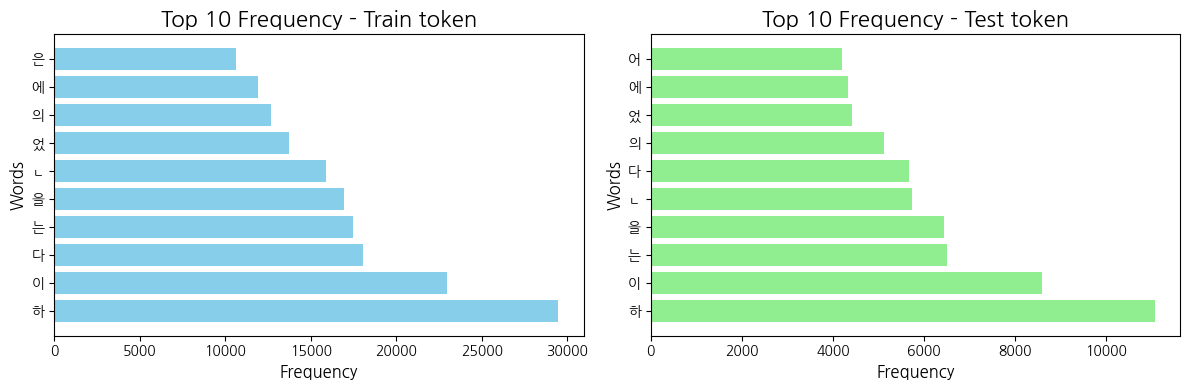

In [ ]:
fig, axes_list = plt.subplots(1, 2, figsize=(12, 4))

plot_frequency(axes_list[0], train_token_frequency, topN=10, title="Train token", color="skyblue")

plot_frequency(axes_list[1], test_token_frequency, topN=10, title="Test token", color="lightgreen")

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer


def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq

In [ ]:
noun_bigrams_train = get_top_ngram(train_noun_corpus, 2)
noun_bigrams_test = get_top_ngram(test_noun_corpus, 2)
token_bigrams_train = get_top_ngram(train_token_corpus, 2)
token_bigrams_test = get_top_ngram(test_token_corpus, 2)

In [ ]:
def plot_top_Ngrams(ax, ngrams, title, color, topN=30):
    """
    상위 N grams의 빈도수를 수평 막대그래프로 시각화합니다.
    """
    # x와 y에 각각 Ngram과 빈도수 저장
    x, y = zip(*ngrams[:topN])

    ax.barh(x, y, color=color)
    ax.set_title(f"Top {topN} N grams - {title}", fontsize=16)
    ax.set_xlabel("Frequency", fontsize=12)
    ax.set_ylabel("N grams", fontsize=12)

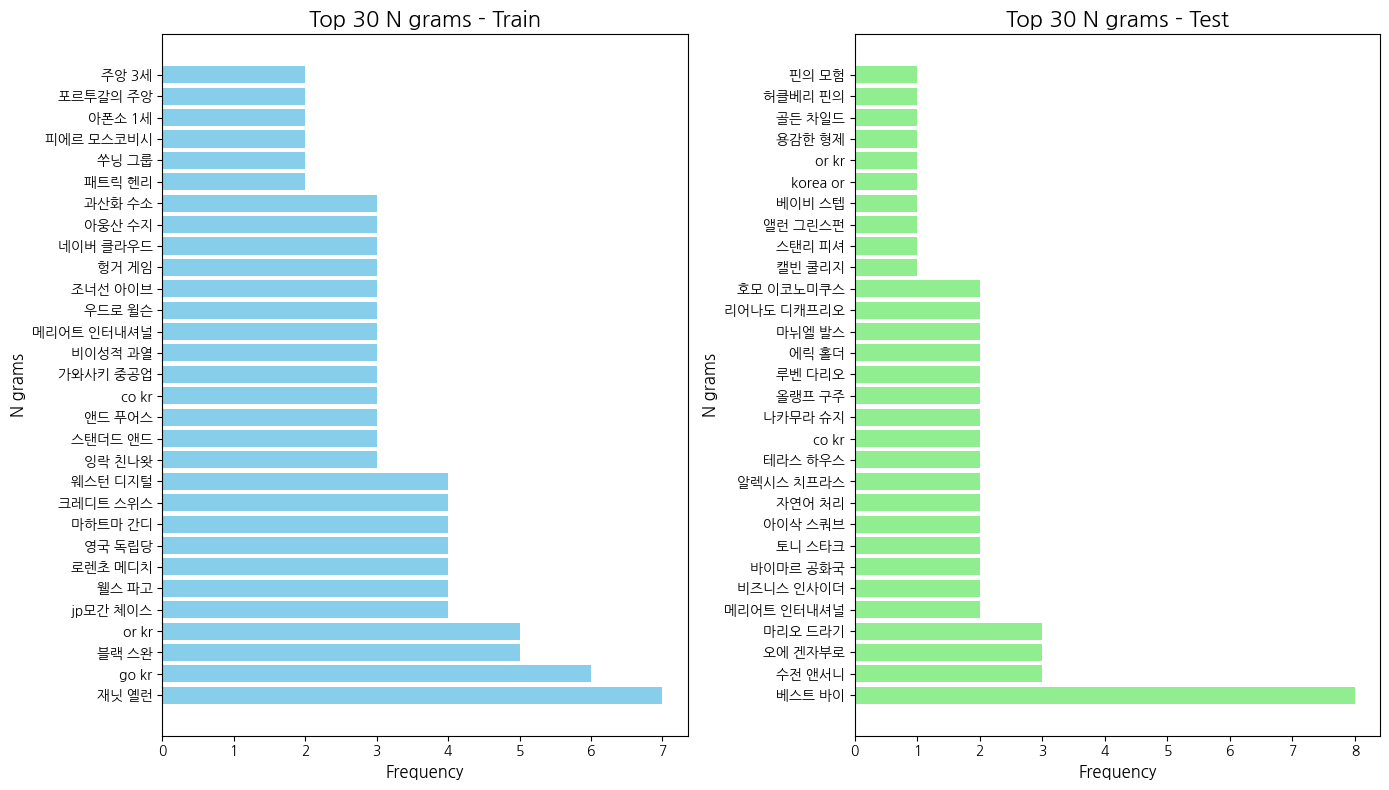

In [ ]:
fig, axes_list = plt.subplots(1, 2, figsize=(14, 8))

plot_top_Ngrams(axes_list[0], noun_bigrams_train, "Train", "skyblue")
plot_top_Ngrams(axes_list[1], noun_bigrams_test, "Test", "lightgreen")

plt.tight_layout()
plt.show()

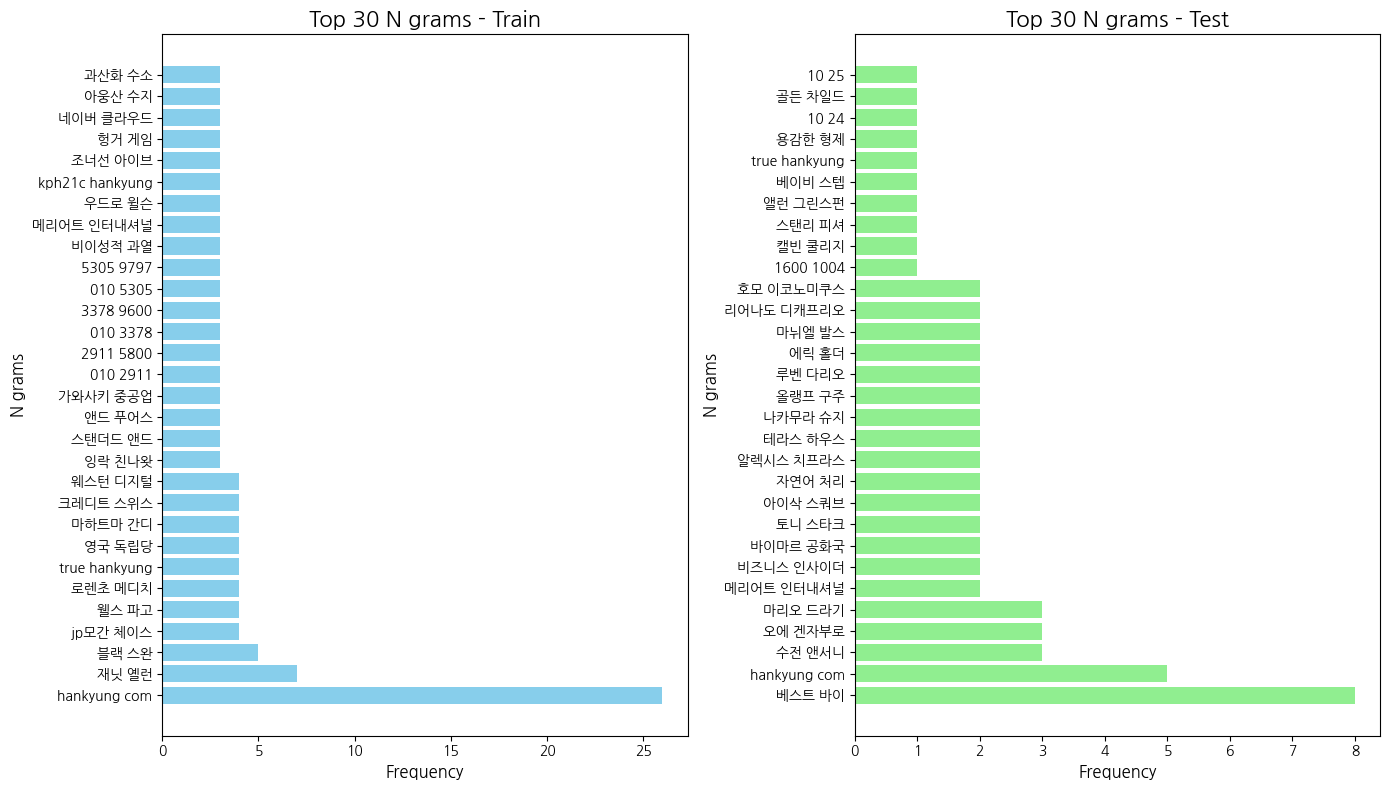

In [ ]:
fig, axes_list = plt.subplots(1, 2, figsize=(14, 8))

plot_top_Ngrams(axes_list[0], token_bigrams_train, "Train", "skyblue")
plot_top_Ngrams(axes_list[1], token_bigrams_test, "Test", "lightgreen")

plt.tight_layout()
plt.show()